# Generate configuration file

Generate hardware and software configuration files
* **Hardware configuration file**: configure the hardware (neurons, synapses, ion channels, monitoring)
* **Software configuration file**: configure the C++ application (monitoring, stimulation, control)

In [4]:
%reload_ext autoreload
%autoreload 2
from configuration.gen_config_2410 import gen_config, NetwConfParams

# Configuration file 
CONFIG_NAME = "customCA1_1612_pres_16"
SAVE_PATH   = "./"

# Stimulations
netw_conf = NetwConfParams()
netw_conf.model                     = "custom" # "custom", "single", "connectoid"
netw_conf.emulation_time_s          = 20       # Set emulation time (s)
netw_conf.en_step_stim              = True     # Enable stimulation step
netw_conf.step_stim_delay_ms        = 10         # Stimulation step delay (ms)
netw_conf.step_stim_duration_ms     = 16000         # Stimulation duration (ms)
netw_conf.local_save_path           = "/savedconfig" # Save path on target
# netw_conf.en_randomize_hh_params    = True  # Randomizing HH parameters for all neurons
# netw_conf.val_randomize_hh_params   = 0.10  # Randomization coefficient (0.1 -> 10%)
# netw_conf.org_wsyninh               = 1.0   # Organoid synaptic weight inhibition
# netw_conf.org_wsynexc               = 0.22  # Organoid synaptic weight excitatory
# netw_conf.org_pcon_in               = 0.08  # Organoid max connection probability internal
# netw_conf.org_pcon_out              = 0.02  # Organoid max connectiosn probability external
# netw_conf.org_wsyn_in               = 1.0   # Organoid synaptic weight internal
# netw_conf.org_wsyn_out              = 1.0   # Organoid synaptic weight external
# netw_conf.org_inh_ratio             = 0.2   # Organoid inhibitory ratio (0.2->20% of inh)

[hwconfig, swconfig] = gen_config(CONFIG_NAME, netw_conf, SAVE_PATH)

Software configuration file saved at: ./swconfig_customCA1_1612_pres_16.json
Hardware configuration file saved at: ./hwconfig_customCA1_1612_pres_16.txt


# Emulate configuration

* Emulate using the configuration files generated

In [ ]:
import numpy as np
from emulation.emulate_config import emulate_config

NEURON_LIST   = [i for i in range(4)]
FPGA_EMU      = False
STORE_CONTEXT = False

exact_emu = emulate_config(hwconfig, swconfig, NEURON_LIST, False, STORE_CONTEXT, dtype=np.float64)

if FPGA_EMU:
    fpga_emu = emulate_config(hwconfig, swconfig, NEURON_LIST, True,  STORE_CONTEXT, dtype=np.float32)

* Plot emulation

In [ ]:
%matplotlib qt
from emulation.plots.SnnPlotter import *

NEURON_TO_DISPLAY       = 0
NEURON_LIST_TO_DISPLAY  = [0,1,2,3]

exact_plotter = SnnPlotter(exact_emu)
# exact_plotter.plotIonRates()
# exact_plotter.plotSynRates()
# exact_plotter.plotIonChanStates(NEURON_TO_DISPLAY)
# exact_plotter.plotCurrents(NEURON_TO_DISPLAY)
exact_plotter.plotVmem(NEURON_LIST_TO_DISPLAY, plot_type='all')
# exact_plotter.plotVmem(NEURON_LIST_TO_DISPLAY, plot_type='comp')
# exact_plotter.plotVmem(NEURON_LIST_TO_DISPLAY, plot_type='subplot')
# exact_plotter.plotRaster()

# Monitoring

* Monitor spikes

In [ ]:
import monitoring.spkmon.main as spike_monitor
spike_monitor.main()

* Monitor waves

In [ ]:
# Monitor one wave with GUI
# import monitoring.vmon.main as vmem_monitor
# vmem_monitor.main()

# Monitor multiple waves
from monitoring.waves.waves_mon import waves_mon

TARGET_IP           = "192.168.137.16"
TARGET_PORT         = "5558"
NB_CHANNELS         = 16
NB_DT_PER_TRANSFER  = 190
WINDOW_SIZE_S       = 1
REFRESH_TIME_S      = 0.1

waves_mon(f"tcp//{TARGET_IP}:{TARGET_PORT}", NB_CHANNELS, NB_DT_PER_TRANSFER, WINDOW_SIZE_S, REFRESH_TIME_S)

* External stimulation

In [ ]:
import monitoring.ext_stim.main as external_stim
external_stim.main()

# Analysis

* Raster

In [2]:
%matplotlib qt
from analysis.draw_raster import draw_raster
from analysis.extract_spikes import extract_spikes
from analysis.spike_analysis import spike_analysis
from analysis.burst_analysis import burst_analysis
import pandas as pd

path        = "raster.csv"
#RASTER_LIST    = [f"{1}"] #[f"single{i}" for i in range(1,4+1)]
REC_DURATION_S = 30
SAVE_FIGS      = True

# draw_raster(DIRPATH, SAVE_FIGS)

x = []
y = []
delimiter = ";"
spikes  = pd.read_csv(path, sep=delimiter)
x.append(spikes['time'])
y.append(spikes['neuron_id'])    

fig = plt.figure("Raster plot")

FONTSIZE = 12
plt.subplot(1,1,1)
plt.scatter(x*1e-3, y, s=1, marker='.', color='black')
plt.ylabel('Neuron index', fontsize=FONTSIZE)
plt.xlabel('Time (s)', fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.show()

# tstamp_list = extract_spikes(DIRPATH, RASTER_LIST, REC_DURATION_S)
# spike_analysis(RASTER_LIST, tstamp_list, REC_DURATION_S)
# burst_analysis(RASTER_LIST, tstamp_list)

KeyError: 'time'

* Waveforms

In [13]:
raster_list = ["raster.csv"]
for i in range(len(raster_list)):
    spikes  = pd.read_csv(raster_list[i], sep=";")
    print(spikes.columns)
    x.append(spikes[0])
    # y.append(spikes['neuron_id'])    

#     fig = plt.figure("Raster plot")
# for i in range(len(raster_list)):
#     plt.subplot(len(raster_list),1,i+1)
#     plt.scatter(x[i]*1e-3, y[i], s=1, marker='.', color='black')
#     plt.ylabel('Neuron index', fontsize=FONTSIZE)
#     plt.xlabel('Time (s)', fontsize=FONTSIZE)
#     plt.yticks(fontsize=FONTSIZE)
#     plt.xticks(fontsize=FONTSIZE)
#     plt.title(raster_list[i])
# plt.show()
    

# fig.savefig('raster.tiff'.format('_'.join(raster_list)), dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"})

Index(['1', '0'], dtype='object')


KeyError: 0

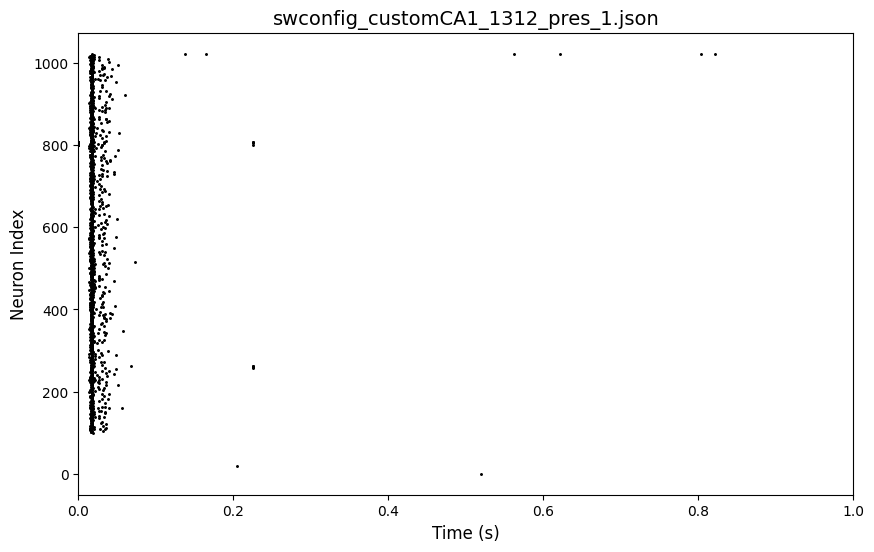

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file = "/Users/Arianna/Documents/RT-HippoNeuroStim/raster.csv"
delimiter = ';'

# Read the CSV file
spikes = pd.read_csv(csv_file, sep=delimiter, header=None, names=['time', 'neuron_id'])

# Create the plot
plt.figure("Raster plot", figsize=(10, 6))
plt.scatter(spikes['time'] * 1e-3, spikes['neuron_id'], s=5, color='black', marker='.')
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Neuron Index", fontsize=12)
plt.title("swconfig_customCA1_1312_pres_1.json", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim([0,1])

# Save and show the plot
plt.savefig("raster.tiff", dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"})
plt.show()

In [ ]:
%matplotlib qt
from analysis.draw_waves import draw_waves

DIRPATH        = "data/"
WAVE_LIST      = ["test1", "test2"]
PLOT_TIME_S    = 0.1
SEL_NRN        = [i for i in range(2)] # up to MAX_NB_NEURONS_WAVES_MON
SAVE_FIGS      = False

draw_waves(DIRPATH, WAVE_LIST, PLOT_TIME_S, SEL_NRN)
